# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

## Read and evaluate the following problem statement: 
Determine which free-tier customers will convert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer usage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: The outcome is demographic and usage data collected from free-tier customers.

#### 2. What are the predictors/covariates? 

Answer: The covariates are demographics and usage data while the predictor would be the relationship between the two. For example, people of a certain age group tend to be more active and the lower the number of days since last log in.

#### 3. What timeframe is this data relevant for?

Answer: January 2015 to April 2015

#### 4. What is the hypothesis?

Answer: Active users between the ages of 25 and 35 who have logged in 2 or less days ago will be more likely to convert from free-tier to paying customers.

## Let's get started with our `admissions.csv` dataset

#### 1. Create a data dictionary 

In [1]:
#General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [6]:
admit_data = pd.read_csv("admissions.csv")
admit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [7]:
admit_data.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


Answer: 

Variable | Description | Type of Variable
---| ---| ---
Admit | 0 = admission granted 1 = admission not granted | categorical(nominal)
gre | test score (points earned) | numeric
gpa | grade point average (points earned/possible points); 0 to 4 scale | numeric 
prestige | level of prestige of current school from 1 to 4 | categorical (ordinal)


We would like to explore the association between admission and other applicant variables (gre, gpa, & prestige)

#### 2. What is the outcome?

Answer: The outcome is whether or not admission was granted based on the gre, gpa and prestige data collected.

#### 3. What are the predictors/covariates? 

Answer: Covariates are gre, gpa, admit (admission) and prestige. The predictor is the relationship between gre, gpa, prestige and whether someone was granted admission or not.

#### 4. What timeframe is this data relevant for?

Answer: Timeframe is unspecified but for the purposes of this assignment let's say this is date from one admissions class in 2015.

#### 5. What is the hypothesis?

Answer: My hypothesis is that prestige positively impacts admission


### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: To determine if there is a correlation between prestige and admission. We will report if higher prestige may increase chances of admission. This could be important for students from less prestigious schools to know if they even have a chance.

#### 2a. What are the assumptions regarding the distribution of the data? 

Answer: Using the plot below we can an initial read on the data distribution.

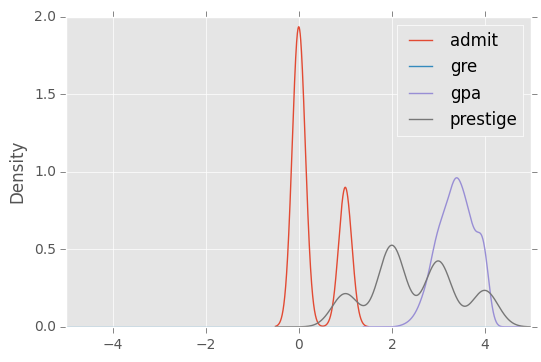

In [11]:
#admit, gpa and prestige visualized below
admit_data.plot(kind="density", xlim=(-5,5));

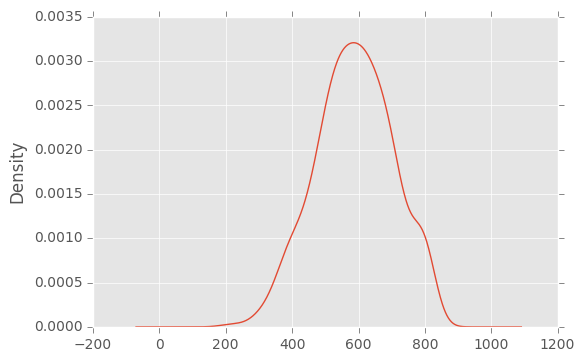

In [13]:
#gre visualized below
admit_data["gre"].plot(kind="density");

#### 2b. How will you determine the distribution of your data? 

Answer: We can get more information about the distribution by looking at the skew and kurtosis below. With the exception of admit they are all roughtly symetrical with gpa and gre skewing a bit to the right. Admit is quite peaked with a left skew. Prestige has a slight left skew.

Given the data is seeming more peaked we would expect kurtosis (indicated below) to be less than 3 meaning there are few outliers.

In [15]:
admit_data.skew()

admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64

In [16]:
admit_data.kurt()

admit      -1.387513
gre        -0.330065
gpa        -0.574623
prestige   -0.894759
dtype: float64

#### 3a. How might outliers impact your analysis? 

Answer: Since there are few outliers we would expect it to have minimal impact on our analysis.

#### 3b. How will you test for outliers? 

Answer: Initially we can use the box plot to help visualize outliers like below. GRE seems to have a couple outliers while GPA has one and prestige doesn't seem to have any 

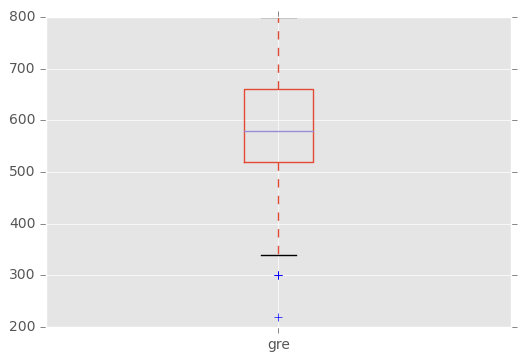

In [14]:
admit_data[["gre"]].plot(kind='box');

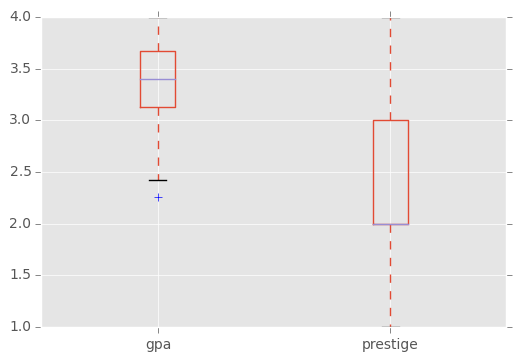

In [18]:
admit_data[["gpa", "prestige"]].plot(kind='box');

#### 4. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Using data distribution plots (in pandas) I first got an initial read on the data distribution followed by using the kurtosis and skew functions to get a general since of the number of outliers. I then used the box plot (in pandas) to more specifically define and visualize the number of outliers. Lastly I used the correlation function in pandas (see below) to determine if there is a correlation between prestige and admission.

I concluded there is acutally a small negative correlation between prestige and admission meaning that prestige has little correlation to admission.

In [20]:
admit_data.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


Answer: 

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model